In [24]:
import arviz as az
from risk_experiment.utils.data import get_all_behavior
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
import scipy.stats as ss

dist = ss.norm(loc=3.5, scale=1./ss.norm().ppf(0.8) * (3.5-1))

In [26]:
df = get_all_behavior(bids_folder='/data/ds-risk')

100%|██████████| 30/30 [00:01<00:00, 29.62it/s]


Text(0.5, 1.05, 'Raw respone curves')

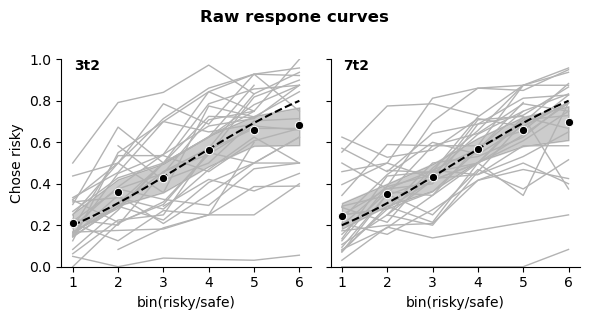

In [96]:
tmp = df.reset_index().groupby(['subject','session', 'bin(risky/safe)']).mean()

g = sns.FacetGrid(data=tmp.reset_index(),col='session')
sns.despine()
plt.ylim(0, 1)
x = np.linspace(1., 6., 50, True)

# Iterate over each subplot to customize further
for session, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.05, .95, session, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=tmp.xs(session, 0, 'session'), x="bin(risky/safe)", y="chose_risky", units="subject",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

    ax.plot(x, dist.cdf(x), c='k', ls='--')

g.map(sns.lineplot, 'bin(risky/safe)', 'chose_risky', marker='o', color='k', linewidth=0.0)
g.set_titles('')
g.set(ylabel='Chose risky', xticks=range(1, 7))
g.fig.suptitle('Raw respone curves', fontweight='bold', y=1.05)

/Users/gdehol/mambaforge/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


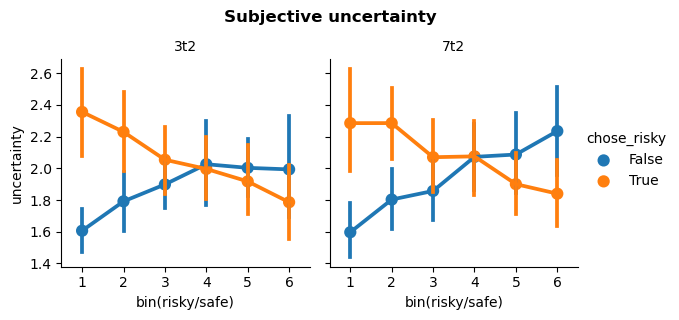

In [95]:
g = sns.FacetGrid(data=df.groupby(['subject', 'session', 'bin(risky/safe)', 'chose_risky']).mean().reset_index(), col='session', hue='chose_risky')
g.map(sns.pointplot, 'bin(risky/safe)', 'uncertainty')
g.add_legend()
g.fig.suptitle('Subjective uncertainty', y=1.05, fontweight='bold')

g.set_titles('{col_name}')